# Lectura de nube de puntos a partir de imagen RGB-D

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/robotica-autonoma-python/blob/main/5-Nubes-Puntos/5-2-Nube-puntos-rgbd.ipynb)

In [1]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# %matplotlib notebook

In [2]:
!wget -q https://raw.githubusercontent.com/oscar-ramos/robotica-autonoma-python/main/5-Nubes-Puntos/datos/manzana-depth.png

In [2]:
# Lectura de la imagen de profundidad
Idepth = mpimg.imread('manzana-depth.png')

Idepth = Idepth[:,:,0]

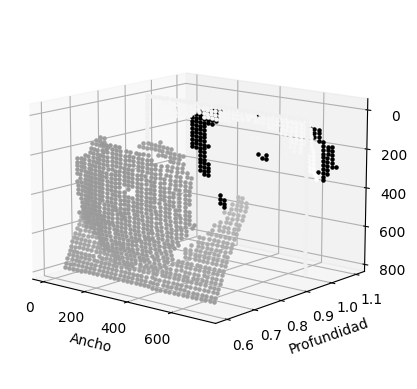

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rows, cols = Idepth.shape
max_val = Idepth.max()*1.1   # Para enviar pixels mapeados incorrectamente hacia atrás
count = 0                    # Cuenta del número de píxeles

# Mostrar solo algunos píxeles
pixel_cut = 20

# Iterar para todos los píxeles
for x in range(cols):
    for y in range(rows):
        if (x % pixel_cut == 0 and y % pixel_cut == 0):
            # Cuenta de píxeles
            count+=1
            # Obtener el color del píxel (gris)
            color_pixel = (Idepth[y,x], Idepth[y,x], Idepth[y,x])
            # Profundidad para cada punto
            profundidad = Idepth[y,x]
            # Enviar píxeles no mapeados correctamente hacia atrás
            if profundidad == 0:
                profundidad = max_val

            ax.scatter(x, profundidad, y, color = color_pixel, marker='.')

# Etiquetas de ejes
ax.set_xlabel('Ancho'); ax.set_ylabel('Profundidad'); ax.set_zlabel('Altura')
plt.gca().invert_zaxis()

# Vista inicial
elevation = 13 # Arriba/abajo
azimuth = -50  # Izquierda/derecha
ax.view_init(elevation, azimuth)

plt.show()

In [4]:
print ("Se muestra {} puntos".format(count))

Se muestra 1520 puntos
